# Time Series vezbanja

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)

In [3]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [4]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])

In [5]:
df['Reason'].head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [6]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [7]:
df['timeStamp'].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [8]:
time=df['timeStamp'].iloc[0]

In [9]:
time.day

10

In [10]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [11]:
Pozivi_po_mesecima = df.groupby('Month').count()
Pozivi_po_mesecima.head(8)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078


<AxesSubplot:xlabel='Month'>

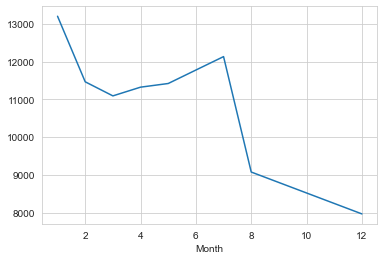

In [12]:
Pozivi_po_mesecima['twp'].plot()

<AxesSubplot:xlabel='Hour'>

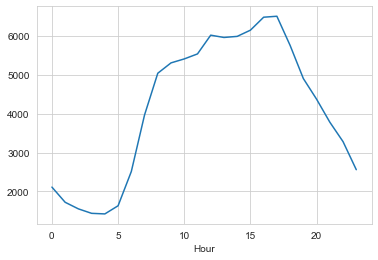

In [13]:
df.groupby('Hour').count()['twp'].plot()

<AxesSubplot:xlabel='Day of Week'>

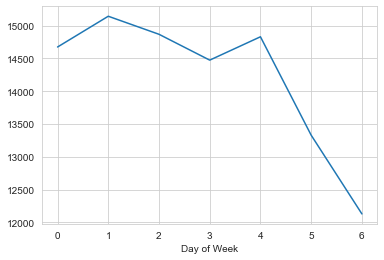

In [14]:
df.groupby('Day of Week').count()['twp'].plot()

In [15]:
sampon = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')

In [16]:
sampon.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [17]:
sampon = sampon.drop("Month", axis=1)

In [18]:
sampon.head()

,Sales
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3


<AxesSubplot:>

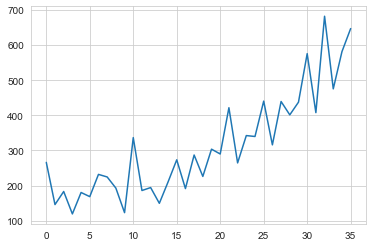

In [19]:
sampon['Sales'].plot()

In [20]:

nezaposlenost = pd.read_csv('file:///Users/vjovanovic/Desktop/Vezbanja/UNRATE.csv')
nezaposlenost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    873 non-null    object 
 1   UNRATE  873 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.8+ KB


<AxesSubplot:>

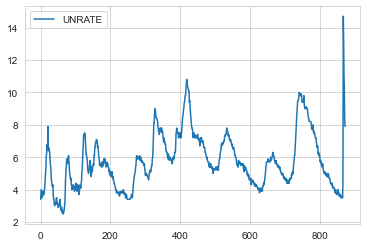

In [21]:
nezaposlenost.plot()

In [22]:
x=nezaposlenost['DATE']
y=nezaposlenost['UNRATE']

<ipython-input-23-7ce2d1881cf7>:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


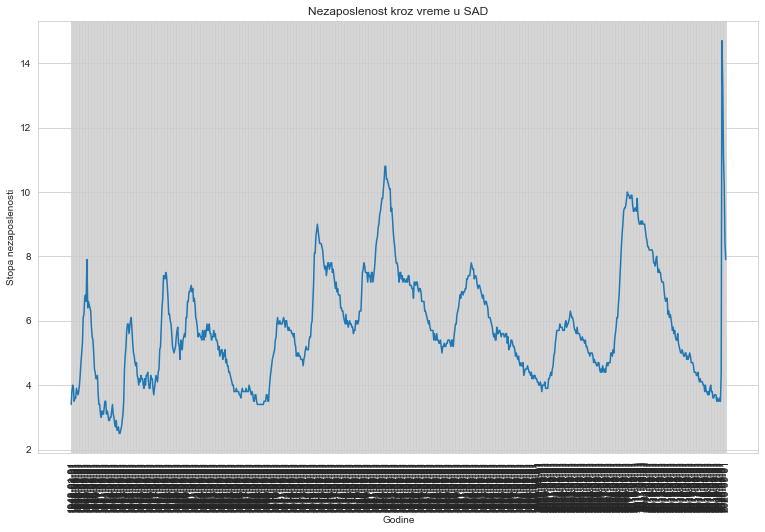

In [23]:
graf = plt.figure(figsize=(10,6))
axes = graf.add_axes([0,0,1,1])
axes.plot(x,y)
axes.set_xlabel('Godine')
axes.set_ylabel('Stopa nezaposlenosti')
axes.set_title('Nezaposlenost kroz vreme u SAD')
plt.xticks(x, rotation='vertical')
plt.tight_layout()

In [24]:
nezaposlenost['DATE'] = pd.to_datetime(nezaposlenost['DATE'])
nezaposlenost['DATE'].head()

0   1948-01-01
1   1948-02-01
2   1948-03-01
3   1948-04-01
4   1948-05-01
Name: DATE, dtype: datetime64[ns]

In [25]:
nezaposlenost['Month'] = nezaposlenost['DATE'].apply(lambda time: time.month)
nezaposlenost['Year'] = nezaposlenost['DATE'].apply(lambda time: time.year)

In [26]:
godine = nezaposlenost.groupby('Year').mean()
godine.head()

,UNRATE,Month
Year,,
1948,3.750000,6.5
1949,6.050000,6.5
1950,5.208333,6.5
1951,3.283333,6.5
1952,3.025000,6.5


<AxesSubplot:xlabel='Year'>

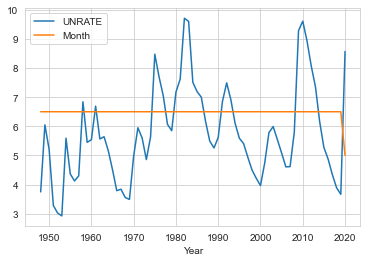

In [27]:
godine.plot()

In [28]:
godine=godine.reset_index()

In [29]:
x=godine['Year']
y=godine['UNRATE']

<ipython-input-30-527c06c7c004>:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


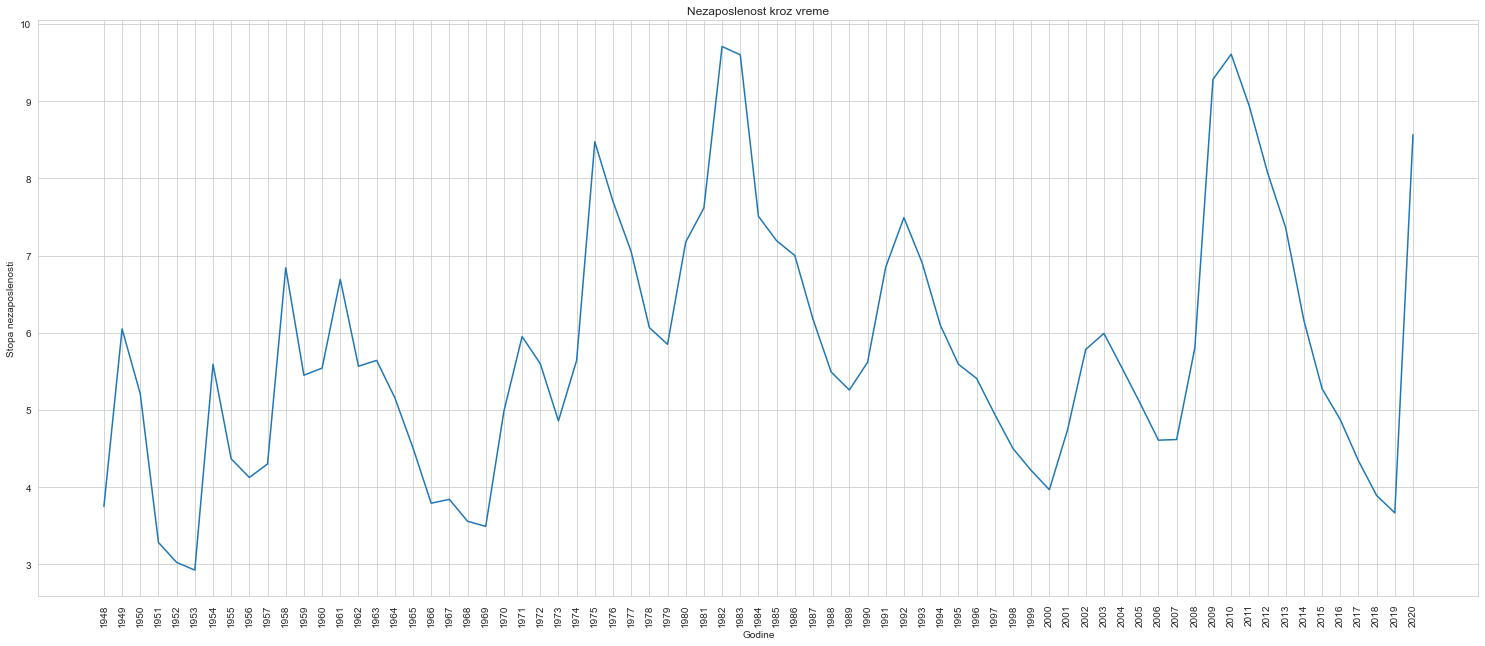

In [30]:
graf = plt.figure(figsize=(20,8))
axes = graf.add_axes([0,0,1,1])
axes.plot(x,y)
axes.set_xlabel('Godine')
axes.set_ylabel('Stopa nezaposlenosti')
axes.set_title('Nezaposlenost kroz vreme')
plt.xticks(x, rotation='vertical')
plt.tight_layout()

In [31]:
import statsmodels
from statsmodels.tsa import stattools
godine_tsa=godine.drop('Month', axis=1)
godine_tsa=godine_tsa.drop('Year', axis=1)
godine_tsa.head()

,UNRATE
0,3.750000
1,6.050000
2,5.208333
3,3.283333
4,3.025000


In [32]:
#Računa ekstrapoluaciju za naredne korake (lagove, 5) na osnovu autokorelacije
import statistics
from statsmodels.tsa.stattools import acf, pacf
godine_auto=statsmodels.tsa.stattools.acf(godine_tsa, nlags=5, qstat=False, fft=True, alpha=None, missing='none')

<AxesSubplot:>

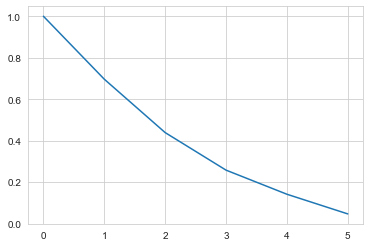

In [33]:
godine_auto_series = pd.Series(godine_auto) #pretvaramo array u series kako bi se mogao plotovati
godine_auto_series.plot()
#na osnovu autokorelacije model predviđa pad nezaposlenosti u narednih 5 godina

0          NaN
1     5.002778
2     4.847222
3     3.838889
4     3.077778
        ...   
68    4.830556
69    4.369444
70    3.966667
71    5.375000
72         NaN
Name: trend, Length: 73, dtype: float64
0    -0.064660
1     0.143557
2    -0.078897
3    -0.064660
4     0.143557
        ...   
68   -0.078897
69   -0.064660
70    0.143557
71   -0.078897
72   -0.064660
Name: seasonal, Length: 73, dtype: float64
0          NaN
1     0.903665
2     0.440008
3    -0.490895
4    -0.196335
        ...   
68    0.123341
69    0.036883
70   -0.218557
71   -1.629437
72         NaN
Name: resid, Length: 73, dtype: float64
0     3.750000
1     6.050000
2     5.208333
3     3.283333
4     3.025000
        ...   
68    4.875000
69    4.341667
70    3.891667
71    3.666667
72    8.566667
Name: UNRATE, Length: 73, dtype: float64


<Figure size 576x576 with 0 Axes>

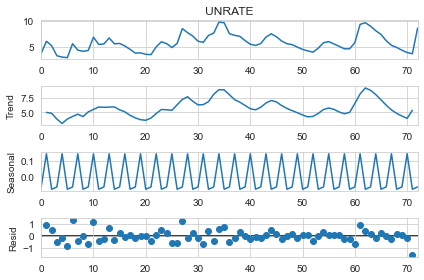

In [34]:
#računa dekompoziciju za sezonu
from statsmodels.tsa.seasonal import seasonal_decompose
series = godine['UNRATE']
result = seasonal_decompose(series, period =3, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
plt.figure(figsize=(8,8))
result.plot()
plt.show()

In [35]:
#ako u model predikcije ubacimo residuale, da li će to dati drugačiju predikciju. Nemamo nikakvu predikciju
#što govori u prilog da su reziduali random walk # ako sve ovo uradimo sa sezonskom komponentom, onda će
#model koji radi na osnovu autokorelacije predvideti sezonu za dati broj lagova
import statistics
from statsmodels.tsa.stattools import acf, pacf
desezonirana_rezidualna_nezaposlenost=statsmodels.tsa.stattools.acf(result.resid, nlags=5, qstat=False, fft=True, alpha=None, missing='none')

<AxesSubplot:>

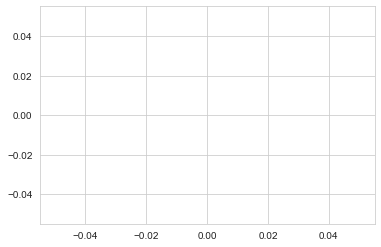

In [36]:
desezonirana_rezidualna_nezaposlenost = pd.Series(desezonirana_rezidualna_nezaposlenost) #pretvaramo array u series kako bi se mogao plotovati
desezonirana_rezidualna_nezaposlenost.plot()
#na osnovu autokorelacije model predviđa pad nezaposlenosti u narednih 5 godina

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
68   NaN
69   NaN
70   NaN
71   NaN
72   NaN
Name: trend, Length: 73, dtype: float64
0     0.907569
1     0.920128
2     1.009985
3     1.123702
4     1.154810
        ...   
68    0.927786
69    0.872739
70    0.907569
71    0.920128
72    1.009985
Name: seasonal, Length: 73, dtype: float64
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
68   NaN
69   NaN
70   NaN
71   NaN
72   NaN
Name: resid, Length: 73, dtype: float64
0     3.750000
1     6.050000
2     5.208333
3     3.283333
4     3.025000
        ...   
68    4.875000
69    4.341667
70    3.891667
71    3.666667
72    8.566667
Name: UNRATE, Length: 73, dtype: float64


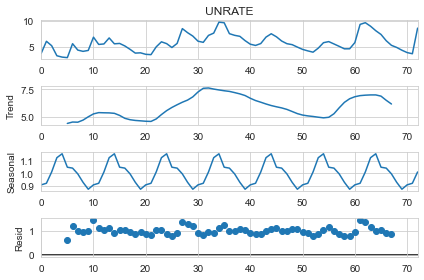

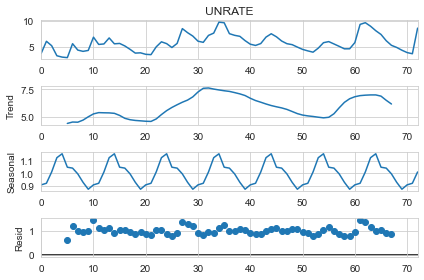

In [37]:
#probamo multiplikativni model sezonske dekompozicije
series_nez=godine['UNRATE']
result_multipl = seasonal_decompose(series_nez, period =10, model='multiplicative')
print(result_multipl.trend)
print(result_multipl.seasonal)
print(result_multipl.resid)
print(result_multipl.observed)
result_multipl.plot()

# Eksponencijalni smoothing (Holt-Winters method)

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

In [39]:
data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
index= pd.date_range(start='1996', end='2008', freq='A')
oildata = pd.Series(data, index)

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.date_range(start='1970', end='2001', freq='A')
livestock2 = pd.Series(data, index)

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= pd.date_range(start='2001', end='2008', freq='A')
livestock3 = pd.Series(data, index)

data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
aust = pd.Series(data, index)

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


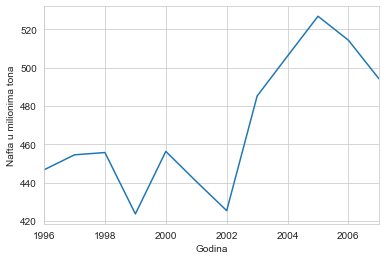

In [40]:
ax=oildata.plot()
ax.set_xlabel("Godina")
ax.set_ylabel("Nafta u milionima tona")
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

Ovde pokrećemo tri varijante jednostavnog eksponencijalnog zaglađivanja (smoothing): 
1. U fit1 ne koristimo automatsku optimizaciju, već odlučujemo da model izričito damo sa 𝛼 = 0,2
2. U fit2 kao gore biramo 𝛼 = 0,6
3. U fit3 omogućavamo statističkim modelima da automatski pronađu optimizirane vrednost za nas. Ovo je preporučeni pristup.

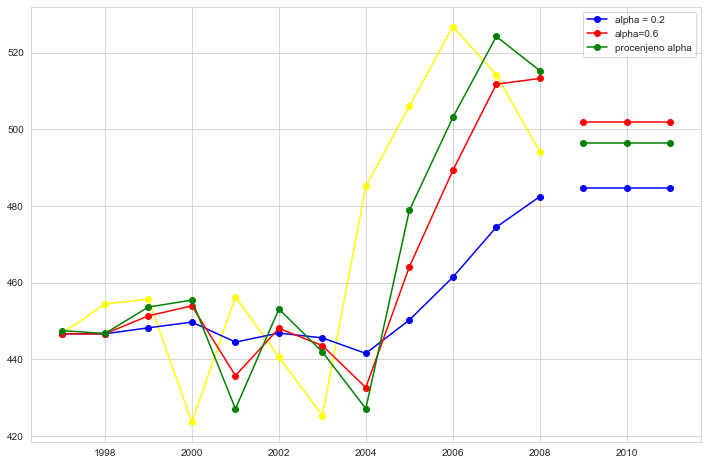

In [41]:
fit1 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(oildata).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker='o', color='yellow')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], ['alpha = 0.2', 'alpha=0.6', 'procenjeno alpha'])

Holtova metoda.Pogledajmo još jedan primer. Ovog puta koristimo podatke o zagađenju vazduha i Holtovu metodu. 
Ponovo ćemo uklopiti tri primera. Alpha je oznaka za smoothing trend (koeficijent zaglađivanja)
1. U fit1 ponovo odlučujemo dakoristimo optimizator i tako dobijamo procenjeni alpha koeficijent (Linearni model)
2. U fit2 radimo isto što i u fit1, ali odlučujemo da koristimo eksponencijalni model, a ne Holtov aditivni model.(eksponencijalni trend)
3. U fit3 smo koristili prigušene verzije Holtovog aditivnog modela, ali dozvoljavamo parametar prigušenja 𝜙 da se optimizuje(aditivni prigušeni trend).
U žutom su izvorni podaci.

In [42]:
data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= pd.date_range(start='1990', end='2005', freq='A')
air = pd.Series(data, index)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


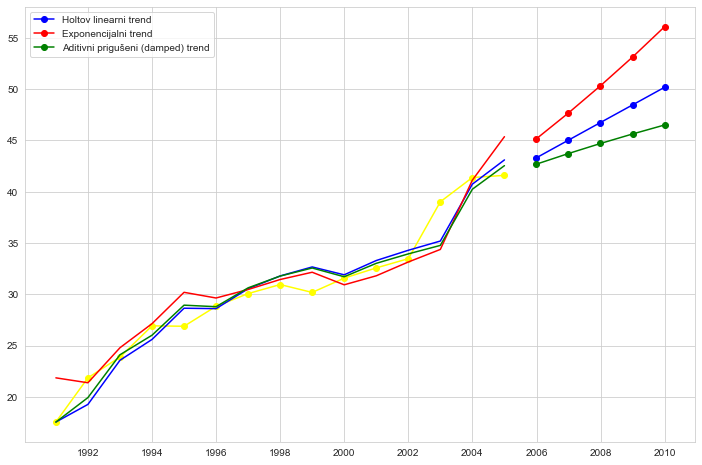

In [43]:
fit1 = Holt(air).fit(optimized=True)
fcast1 = fit1.forecast(5).rename("Holtov linearni trend")
fit2 = Holt(air, exponential=True).fit(optimized=True)
fcast2 = fit2.forecast(5).rename("Exponencijalni trend")
fit3 = Holt (air, damped=True).fit(optimized=True)
fcast3 = fit3.forecast(5).rename("Aditivni prigušeni (damped) trend")

plt.figure(figsize=(12, 8))
plt.plot(air, marker='o', color='yellow')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

Konačno smo u mogućnosti da izvodimo celokupno Holtovo Vinterovo sezonsko eksponencijalno zaglađivanje, uključujući komponentu trenda i sezonsku komponentu. statsmodels omogućava sve kombinacije uključujući kako je prikazano u primerima ispod: 
1. fit1 aditivni trend, aditiv sezonski za period sezona_dužina = 4 i upotreba Bok-Cok transformacije. 
2. fit2 aditivni trend, multiplikativni sezonski za period sezona_dužina = 4 i upotreba Bok-Cok transformacije .. 3. fit3 aditiv prigušen trend, aditiv sezonski za period sezona_dužina = 4 i upotreba Bok-Cok transformacije. 
4. fit4 prigušeni trend aditiva, multiplikativni sezonski za period sezona_dužina = 4 i upotreba Bok-Cok transformacije.

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


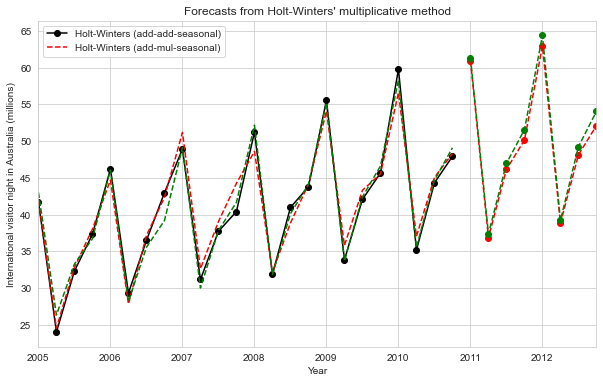

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,0.421053,6.943901e-09,0.368421,7.811061e-09
$\beta$,0.246942,2.020698e-10,0.046726,3.980834e-17
$\phi$,NaN,NaN,0.841068,9.656754e-01
$\gamma$,0.578947,8.039493e-07,0.631579,6.783973e-14
$l_0$,49.143098,5.056803e+01,49.383296,5.055410e+01
SSE,63.625551,3.459374e+01,68.386442,3.018110e+01


In [45]:
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add').fit()
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='multiplicative').fit()
fit3 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit()
fit4 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='multiplicative', damped=True).fit()
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

# Čišćenje od trenda i sezonalnosti (detrendovanje i desezoniranje)

In [46]:
co2 = [315.58, 316.39, 316.79, 317.82, 318.39, 318.22, 316.68, 315.01, 314.02, 313.55,
       315.02, 315.75, 316.52, 317.10, 317.79, 319.22, 320.08, 319.70, 318.27, 315.99,
       314.24, 314.05, 315.05, 316.23, 316.92, 317.76, 318.54, 319.49, 320.64, 319.85,
       318.70, 316.96, 315.17, 315.47, 316.19, 317.17, 318.12, 318.72, 319.79, 320.68,
       321.28, 320.89, 319.79, 317.56, 316.46, 315.59, 316.85, 317.87, 318.87, 319.25,
       320.13, 321.49, 322.34, 321.62, 319.85, 317.87, 316.36, 316.24, 317.13, 318.46,
       319.57, 320.23, 320.89, 321.54, 322.20, 321.90, 320.42, 318.60, 316.73, 317.15,
       317.94, 318.91, 319.73, 320.78, 321.23, 322.49, 322.59, 322.35, 321.61, 319.24,
       318.23, 317.76, 319.36, 319.50, 320.35, 321.40, 322.22, 323.45, 323.80, 323.50,
       322.16, 320.09, 318.26, 317.66, 319.47, 320.70, 322.06, 322.23, 322.78, 324.10,
       324.63, 323.79, 322.34, 320.73, 319.00, 318.99, 320.41, 321.68, 322.30, 322.89,
       323.59, 324.65, 325.30, 325.15, 323.88, 321.80, 319.99, 319.86, 320.88, 322.36,
       323.59, 324.23, 325.34, 326.33, 327.03, 326.24, 325.39, 323.16, 321.87, 321.31,
       322.34, 323.74, 324.61, 325.58, 326.55, 327.81, 327.82, 327.53, 326.29, 324.66,
       323.12, 323.09, 324.01, 325.10, 326.12, 326.62, 327.16, 327.94, 329.15, 328.79,
       327.53, 325.65, 323.60, 323.78, 325.13, 326.26, 326.93, 327.84, 327.96, 329.93,
       330.25, 329.24, 328.13, 326.42, 324.97, 325.29, 326.56, 327.73, 328.73, 329.70,
       330.46, 331.70, 332.66, 332.22, 331.02, 329.39, 327.58, 327.27, 328.30, 328.81,
       329.44, 330.89, 331.62, 332.85, 333.29, 332.44, 331.35, 329.58, 327.58, 327.55,
       328.56, 329.73, 330.45, 330.98, 331.63, 332.88, 333.63, 333.53, 331.90, 330.08,
       328.59, 328.31, 329.44, 330.64, 331.62, 332.45, 333.36, 334.46, 334.84, 334.29,
       333.04, 330.88, 329.23, 328.83, 330.18, 331.50, 332.80, 333.22, 334.54, 335.82,
       336.45, 335.97, 334.65, 332.40, 331.28, 330.73, 332.05, 333.54, 334.65, 335.06,
       336.32, 337.39, 337.66, 337.56, 336.24, 334.39, 332.43, 332.22, 333.61, 334.78,
       335.88, 336.43, 337.61, 338.53, 339.06, 338.92, 337.39, 335.72, 333.64, 333.65,
       335.07, 336.53, 337.82, 338.19, 339.89, 340.56, 341.22, 340.92, 339.26, 337.27,
       335.66, 335.54, 336.71, 337.79, 338.79, 340.06, 340.93, 342.02, 342.65, 341.80,
       340.01, 337.94, 336.17, 336.28, 337.76, 339.05, 340.18, 341.04, 342.16, 343.01,
       343.64, 342.91, 341.72, 339.52, 337.75, 337.68, 339.14, 340.37, 341.32, 342.45,
       343.05, 344.91, 345.77, 345.30, 343.98, 342.41, 339.89, 340.03, 341.19, 342.87,
       343.74, 344.55, 345.28, 347.00, 347.37, 346.74, 345.36, 343.19, 340.97, 341.20,
       342.76, 343.96, 344.82, 345.82, 347.24, 348.09, 348.66, 347.90, 346.27, 344.21,
       342.88, 342.58, 343.99, 345.31, 345.98, 346.72, 347.63, 349.24, 349.83, 349.10,
       347.52, 345.43, 344.48, 343.89, 345.29, 346.54, 347.66, 348.07, 349.12, 350.55,
       351.34, 350.80, 349.10, 347.54, 346.20, 346.20, 347.44, 348.67]
co2 = pd.Series(co2, index=pd.date_range('1-1-1959', periods=len(co2), freq='M'), name = 'CO2')

In [47]:
co2.describe()

count    348.000000
mean     330.123879
std       10.059747
min      313.550000
25%      321.302500
50%      328.820000
75%      338.002500
max      351.340000
Name: CO2, dtype: float64

Loess detrendovanje

U stl model ubacujemo jednu vremensku seriju, a kao parametar seasonal ubacujemo period sezonalnosti za koji mislimo da je najpogodniji za našu vremensku seriju - defoltno je 7

In [48]:
plt.rc('figure',figsize=(10,6))
plt.rc('font',size=13)

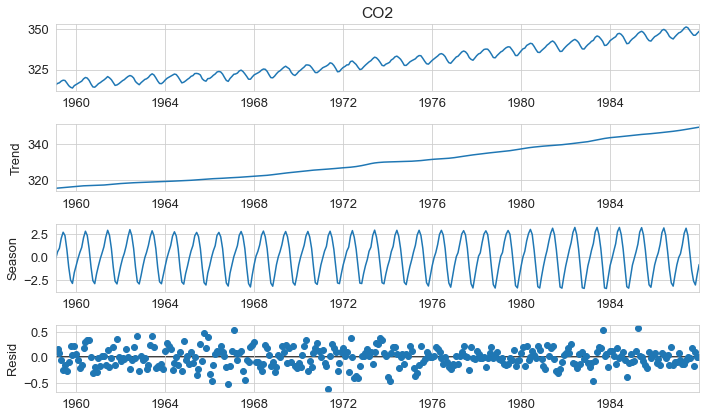

In [49]:
from statsmodels.tsa.seasonal import STL
stl = STL(co2, seasonal=7)
res = stl.fit()
fig = res.plot()

# Provera stacionarnosti kroz diferenciranje serije

In [50]:
import statsmodels.api as sm

In [51]:
sunspots = sm.datasets.sunspots.load_pandas().data
sunspots.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del sunspots["YEAR"]

<AxesSubplot:>

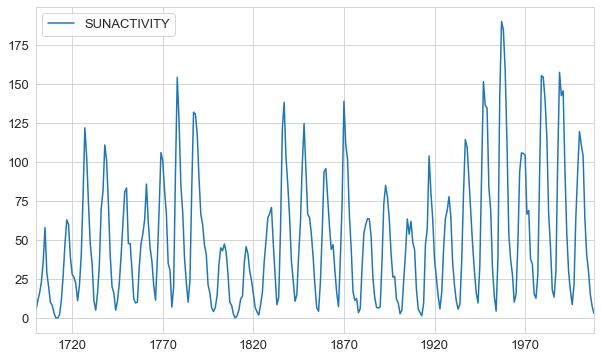

In [52]:
sunspots.plot(figsize=(10,6))

Detrendovanje kroz diferenciranje je najjednostavniji način za proveru stacionarnosti (nepromenljivosti aritmetičke sredine i varijacije) u vremenskoj seriji. Oduzimamo u donjem slučaju od t vrednosti vremenske serije t-1 vrednost vremenske serije (shift=1)

<AxesSubplot:>

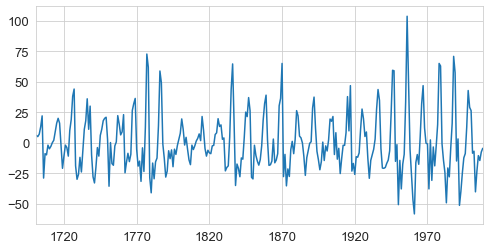

In [53]:
sunspots['SUNACTIVITY_diff'] = sunspots['SUNACTIVITY'] - sunspots['SUNACTIVITY'].shift(1)
sunspots['SUNACTIVITY_diff'].dropna().plot(figsize=(8,4))

Na diferenciranu vremensku seriju primenjujemo Augmented Dickey Fuller (“ADF”) test za procenu stacionarnosti. 
ADF test se koristi za utvrđivanje prisustva jedinstvenog korena u seriji, a samim tim pomaže u razumevanju da li je serija stacionarna ili ne. Nulta i alternativna hipoteza ovog testa su:

Nulta hipoteza: Serija je stacionarna. Alternativna hipoteza: Serija nije stacionarna.

Ako nulta hipoteza nije odbačena, ovaj test može pružiti dokaz da serija nije stacionarna.

Stvorena je funkcija za sprovođenje ADF testa na vremenskoj seriji.

In [54]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [55]:
adf_test(sunspots['SUNACTIVITY_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.486166e+01
p-value                        1.715552e-27
#Lags Used                     7.000000e+00
Number of Observations Used    3.000000e+02
Critical Value (1%)           -3.452337e+00
Critical Value (5%)           -2.871223e+00
Critical Value (10%)          -2.571929e+00
dtype: float64


Navedeni rezultati govore da nema smisla odbaciti nultu hipotezu (p>0.05), prihvatamo nultu hipotezu. 
Diferencirana vremenska serija sunčane aktivnosti je stacionarna.
Ako uradimo isti test na nediferenciranoj vremenskoj seriji, dobićemo da ona nije stacionarna.

In [56]:
adf_test(sunspots['SUNACTIVITY'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


# Autoregresija

Autoregresija se moze primenjivati i na stacionarne i na nestacionarne vremenske serije. 
Ako nam je regresioni koeficijent 1, u pitanju je random walk. Autoregresija prvog reda jeste predviđanje na osnovu jednog prethodnog perioda AR(1) a drugog reda na osnovu dva lag-a AR(2). Probaćemo prvo jedan a onda drugi model na podacima o sunčevoj aktivnosti.

In [57]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [58]:
mod1 = AutoReg(sunspots['SUNACTIVITY'], 1)
res1 = mod1.fit()
print(res1.summary())

                            AutoReg Model Results                             
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     AutoReg(1)   Log Likelihood               -1401.370
Method:               Conditional MLE   S.D. of innovations             22.896
Date:                Mon, 02 Nov 2020   AIC                              6.281
Time:                        13:36:17   BIC                              6.318
Sample:                    12-31-1701   HQIC                             6.296
                         - 12-31-2008                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          8.7869      2.075      4.236      0.000       4.721      12.853
SUNACTIVITY.L1     0.8238      0.032     25.487      0.000       0.760       0.887
                                    

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


In [59]:
#Probamo AR(2) model. Oba modela uspešno rade
mod2 = AutoReg(sunspots['SUNACTIVITY'], 2)
res2 = mod2.fit()
print(res2.summary())

                            AutoReg Model Results                             
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     AutoReg(2)   Log Likelihood               -1298.032
Method:               Conditional MLE   S.D. of innovations             16.596
Date:                Mon, 02 Nov 2020   AIC                              5.644
Time:                        13:36:17   BIC                              5.693
Sample:                    12-31-1702   HQIC                             5.664
                         - 12-31-2008                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         14.9071      1.553      9.600      0.000      11.864      17.951
SUNACTIVITY.L1     1.3918      0.041     33.683      0.000       1.311       1.473
SUNACTIVITY.L2    -0.6903      0.041

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


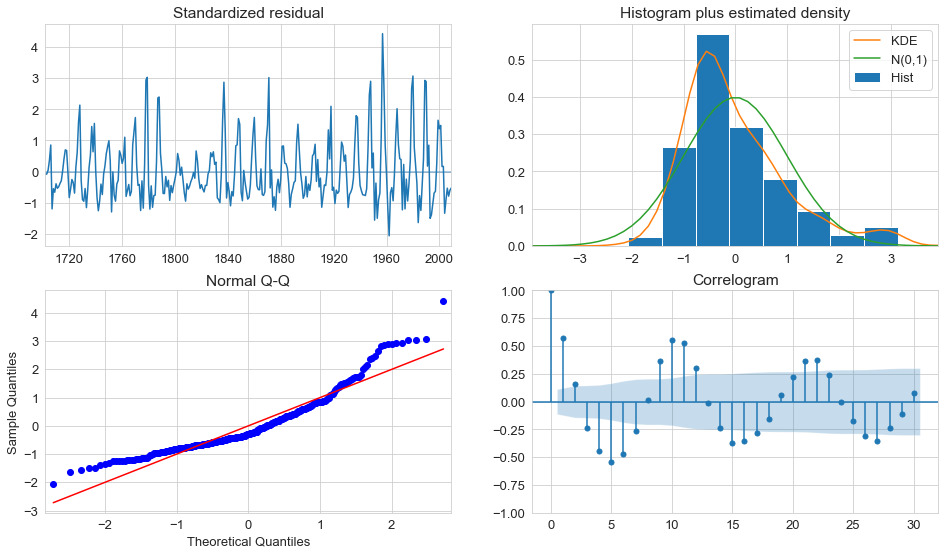

In [60]:
fig = plt.figure(figsize=(16,9))
fig = res1.plot_diagnostics(fig=fig, lags=30)

In [61]:
#Čistimo od sezonalnosti i ponovo to čekiramo
stl = STL(sunspots['SUNACTIVITY'], seasonal=7, period=3)
desezonirano_sunce = stl.fit()
desezonirano_sunce.resid

1700-12-31    0.453534
1701-12-31    0.886048
1702-12-31   -5.434858
1703-12-31    1.539205
1704-12-31   -1.477644
                ...   
2004-12-31   -2.291267
2005-12-31   -2.214164
2006-12-31   -0.105932
2007-12-31    1.635778
2008-12-31   -0.961509
Name: resid, Length: 309, dtype: float64

In [62]:
mod2 = AutoReg(desezonirano_sunce.resid, 2)
res2 = mod2.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


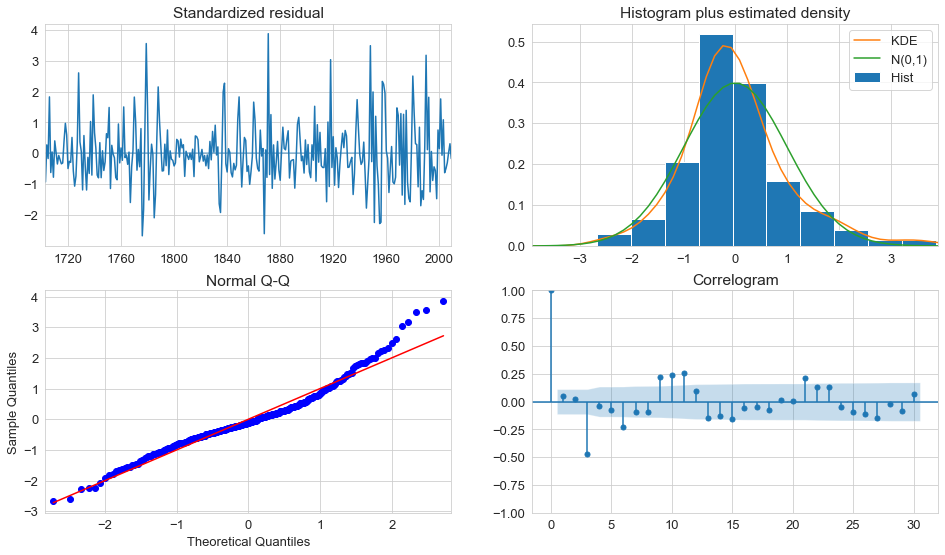

In [63]:
fig = plt.figure(figsize=(16,9))
fig = res2.plot_diagnostics(fig=fig, lags=30)

# State space models

Ovi modeli su dobri za nestacionarne nelinearne modele. Filteri se koriste kako bi se na osnovu t updejtovalo t,
forecasting za predviđanje t na osnovu t-1 i smoothing kada na osnovu t-1 i t+1 procenjujemo t. 
U ove modele spadaju FARIMA (ARIMA model koji dozvoljava non-integer vrednosti za parametar diferenciranja) kao i drugi ARIMA i SARIMA modeli (seasonal ARIMA).

Da bi autoregresivni i modeli pokretnog proseka radili, podaci moraju biti stacionarni. To znači da podaci ne smeju imati trendove ili sezonalnost. Integracija uzima razliku u vremenskim serijama (AR-I-MA), od svake vrednosti oduzimajući prethodnu vrednost, koja teži da podaci postanu stacionarniji. Postoji vrednost koja se naziva „d“ koja predstavlja koliko puta treba sprovesti diferenciranje podataka. Poput vrednosti p u autoregresivnom modelu, najbolje je jednostavno isprobati nekoliko različitih vrednosti za d i videti koji model ima minimalni AIC.

ARIMA model

In [64]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
# Register converters to avoid warnings
pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [65]:
x=np.arange(0,124)
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123])

In [66]:
# Dataset
wpi1 = requests.get('https://www.stata-press.com/data/r12/wpi1.dta').content
data = pd.read_stata(BytesIO(wpi1))
data.index = data.t
# Set the frequency
data.index.freq="QS-OCT"
#data['kvartal']=data[]

data['kvartal']= pd.Series(x).values

#sales['Date']=pd.to_datetime(sales['Date'])

In [67]:
data.head()

,wpi,t,ln_wpi,kvartal
t,,,,
1960-01-01,30.700001,1960-01-01,3.424263,0
1960-04-01,30.799999,1960-04-01,3.427515,1
1960-07-01,30.700001,1960-07-01,3.424263,2
1960-10-01,30.700001,1960-10-01,3.424263,3
1961-01-01,30.799999,1961-01-01,3.427515,4


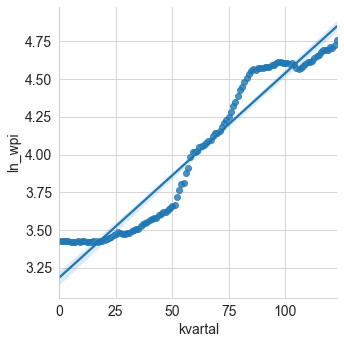

In [68]:
sns.lmplot(x='kvartal', y='ln_wpi', data=data)

In [69]:
# Fit the model
#Fitujemo SARIMAX(1,1,1) model, sezonsku arimu prvog reda(i MA je prvog reda), 
#a X predstavlja uticaj spoljnog faktora.
#SARIMAX za razliku od ARIMA modela zahteva još jedan par p,d,q koji odslikavaju sezonalnost.
#p-broj lagova koji koristimo za autoregresiju
#d-koliko smo puta sproveli diferenciranje (uvek se oduzima t-(t-1))
#q-broj lagova koji koristimo za pokretni prosek (MA)
#sigma2 u narednom ispisu predstavlja varijansu greške od 𝜖𝑡
#model izgleda
#Δ𝑦𝑡=0.0943+0.8742(Δ𝑦𝑡−1)−0.4120𝜖𝑡−1+𝜖𝑡
#preko parametra order=(1,1,1) određujemo karakteristike modela: 
#prvo mesto označava broj lagova koji koristimo za autoregresiju (p)
#drugo mesto označava koliko smo puta sproveli diferenciranje (d)
#treće mesto označava broj lagova koji koristimo za pokretni prosek (MA)(q)

#Jedan od načina da se utvrdi adekvatno p jeste primena Akaike kriterijuma AIK
mod = sm.tsa.statespace.SARIMAX(data['wpi'], trend='c', order=(1,1,1))
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    wpi   No. Observations:                  124
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -135.351
Date:                Mon, 02 Nov 2020   AIC                            278.703
Time:                        13:36:21   BIC                            289.951
Sample:                    01-01-1960   HQIC                           283.272
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0943      0.068      1.389      0.165      -0.039       0.227
ar.L1          0.8742      0.055     16.028      0.000       0.767       0.981
ma.L1         -0.4120      0.100     -4.119      0.0

In [70]:
data['ln_wpi'] = np.log(data['wpi'])
data['D.ln_wpi'] = data['ln_wpi'].diff()

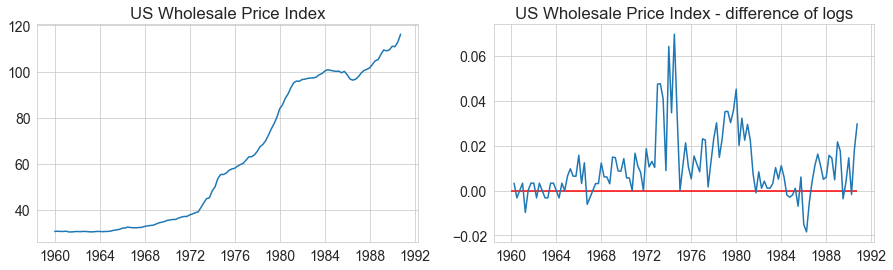

In [71]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

# Levels
axes[0].plot(data.index._mpl_repr(), data['wpi'], '-')#običan timeseries plot
axes[0].set(title='US Wholesale Price Index')

# Log difference
axes[1].plot(data.index._mpl_repr(), data['D.ln_wpi'], '-')#plot diferenciranih logova
axes[1].hlines(0, data.index[0], data.index[-1], 'r')
axes[1].set(title='US Wholesale Price Index - difference of logs');

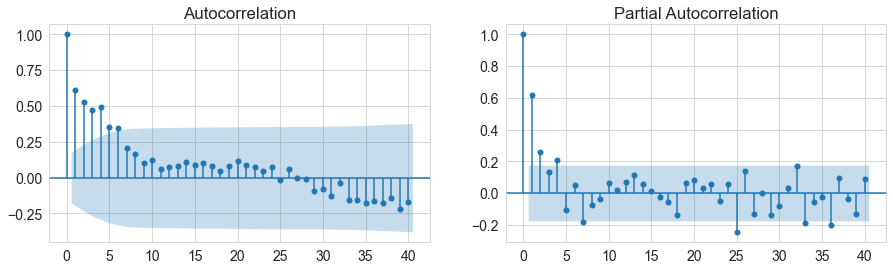

In [72]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['D.ln_wpi'], 
                               lags=40, 
                               ax=axes[0])#autokorelacija diferenciranih logova
fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['D.ln_wpi'], 
                                lags=40, 
                                ax=axes[1])#parcijalna korelacija diferenciranih logova

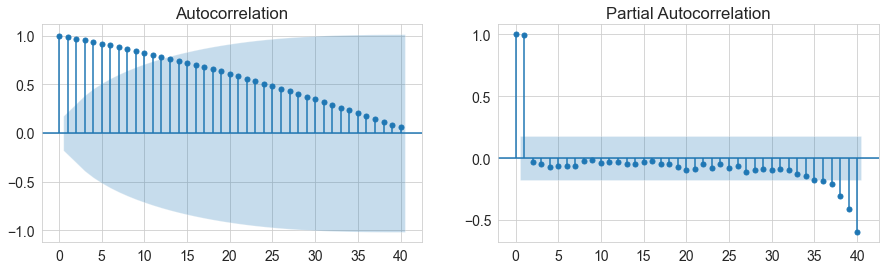

In [73]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(data.iloc[1:]['ln_wpi'], 
                               lags=40, 
                               ax=axes[0])#autokorelacija izvorne vremenske serije
fig = sm.graphics.tsa.plot_pacf(data.iloc[1:]['ln_wpi'], 
                                lags=40, 
                                ax=axes[1])#parcijalna korelacija izvorne vremenske serije

Sledeći kod za različite kombinacije p,q i d pronalazi najmanji AIC i tako bira najoptimalniji ARIMA model vremenske serije.

In [74]:
from statsmodels.tsa.arima_model import ARIMA
import itertools
# Grid Search
p = d = q = range(0,3) # p, d, and q can be either 0, 1, or 2
pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q
combs = {} # stores aic and order pairs
aics = [] # stores aics
# Grid Search continued
for combination in pdq:
    try:
        model = ARIMA(data.iloc[1:]['D.ln_wpi'], order=combination) # create all possible models
        model = model.fit()
        combs.update({model.aic : combination}) # store combinations
        aics.append(model.aic)
    except:
        continue
best_aic = min(aics)
        # Model Creation and Forecasting
#model = ARIMA(data, order=combs[best_aic])
#model = model.fit()
#model.forecast(7)[0]

In [75]:
min(combs)

-756.8542532151689

In [76]:
combs[best_aic]

(1, 0, 1)

SARIMAX pretrazuje jos jedan parametar, a to je sezonalnost.

In [77]:
#Sezonalnost je uključena kroz četvrti parametar 12 (s obzirom da imamo podatke o mesecima, 
#sezona nam predstavlja godinu)
#Sezona kao takva zadaje parametre za sezonu, a to su isto AR,I i MA, plus period sezone.
#Parametar sezonoe je seasonal_order


In [78]:
# Dataset
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data = pd.read_stata(BytesIO(air2))
data.index = pd.date_range(start=datetime(data.time[0], 1, 1), periods=len(data), freq='MS')
data['lnair'] = np.log(data['air'])

# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['lnair'], order=(2,1,0), seasonal_order=(1,1,0,12), simple_differencing=True)
res = mod.fit(disp=False)
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       D.DS12.lnair   No. Observations:                  131
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 12)   Log Likelihood                 240.821
Date:                            Mon, 02 Nov 2020   AIC                           -473.643
Time:                                    13:36:25   BIC                           -462.142
Sample:                                02-01-1950   HQIC                          -468.970
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4057      0.080     -5.045      0.000      -0.563      -0.248
ar.L2         -0.0799      0.099   

<ipython-input-78-055d8479c397>:4: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  data.index = pd.date_range(start=datetime(data.time[0], 1, 1), periods=len(data), freq='MS')


In [ ]:
import statsmodels.api as sm
import itertools
# Grid Search
p = d = q = range(0,3) # p, d, and q can be either 0, 1, or 2
pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
p2 = d2 = q2 = range(0, 2) # second set of p's, d's, and q's
pdq2 = list(itertools.product(p2,d2,q2)) # simular too code above but for seasonal parameters
s = 12 # here I use twelve but the number here is representative of the periodicty of the seasonal cycle
pdqs2 = [(c[0], c[1], c[2], s) for c in pdq2]
combs = {}
aics = []
# Grid Search Continued
for combination in pdq:
    for seasonal_combination in pdqs2:
        try:
            model = sm.tsa.statespace.SARIMAX(data['lnair'], order=combination, seasonal_order=seasonal_combination,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            model = model.fit()
            combs.update({model.aic : [combination, seasonal_combination]})
            aics.append(model.aic)
            
        except:
            continue
            
best_aic = min(aics)

In [92]:
combs

{904.7262657851586: [(0, 0, 0), (0, 0, 0, 12)],
 748.5644964071139: [(0, 0, 0), (0, 0, 1, 12)],
 -152.75611129329016: [(0, 0, 0), (0, 1, 0, 12)],
 -197.43291910738031: [(0, 0, 0), (0, 1, 1, 12)],
 -75.65005462855567: [(0, 0, 0), (1, 0, 0, 12)],
 -120.25901258403215: [(0, 0, 0), (1, 0, 1, 12)],
 -244.68049926186336: [(0, 0, 0), (1, 1, 0, 12)],
 -301.07617294481855: [(0, 0, 0), (1, 1, 1, 12)],
 713.258965901621: [(0, 0, 1), (0, 0, 0, 12)],
 556.2689198812873: [(0, 0, 1), (0, 0, 1, 12)],
 -259.38246678287: [(0, 0, 1), (0, 1, 0, 12)],
 -278.2737985860138: [(0, 0, 1), (0, 1, 1, 12)],
 -173.09499799826426: [(0, 0, 1), (1, 0, 0, 12)],
 -134.15237056916564: [(0, 0, 1), (1, 0, 1, 12)],
 -300.2641806020756: [(0, 0, 1), (1, 1, 0, 12)],
 -353.7875440115582: [(0, 0, 1), (1, 1, 1, 12)],
 532.7463967404453: [(0, 0, 2), (0, 0, 0, 12)],
 387.1639381783191: [(0, 0, 2), (0, 0, 1, 12)],
 -331.52797476238703: [(0, 0, 2), (0, 1, 0, 12)],
 -344.6231504264641: [(0, 0, 2), (0, 1, 1, 12)],
 -277.38390493944684:

In [ ]:
# Modeling and forcasting
model = sm.tsa.statespace.SARIMAX(data, order=combs[best_aic][0], seasonal_order=combs[best_aic][1],
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
model = model.fit()
model.forecast(7)

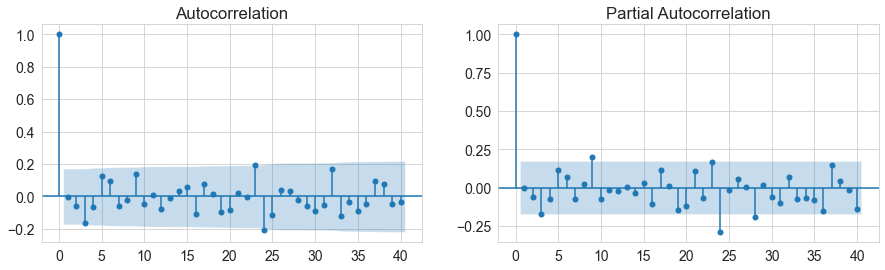

In [81]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(res.resid, lags=40, ax=axes[0])
#autokorelacija reziduala nakon desezoniranja vremenske serije kroz SARIMAX model

fig = sm.graphics.tsa.plot_pacf(res.resid, lags=40, ax=axes[1])
#parcijalna autokorelacija reziduala nakon desezoniranja vremenske serije kroz SARIMAX model
#S obzirom da su sve korelacije u opsegu da nisu statistički značajne,
#model je uspešno došao do random walk-a, odnosno identifikovao uspešno
#sve komponente vremenske serije

Jednom kada se naprave ovi modeli, vreme je za predviđanje. Predviđanje se može izvršiti pozivanjem „.forcast (Ks)“ gde je Ks količina vremenskih intervala koje želite da prognozirate. 

In [82]:
data['lnair']

1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230482
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Freq: MS, Name: lnair, Length: 144, dtype: float32

<AxesSubplot:>

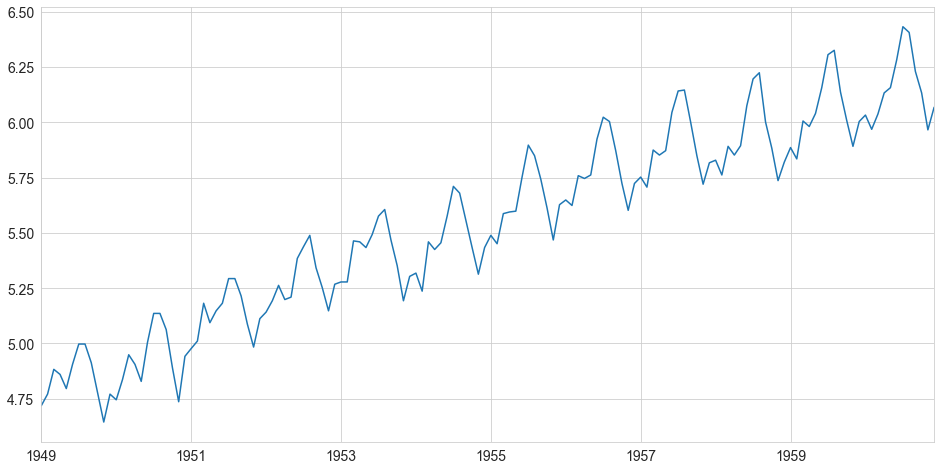

In [83]:
data['lnair'].plot()

In [84]:
# Create Training and Test
train = data['lnair'][:100]
test = data['lnair'][100:]

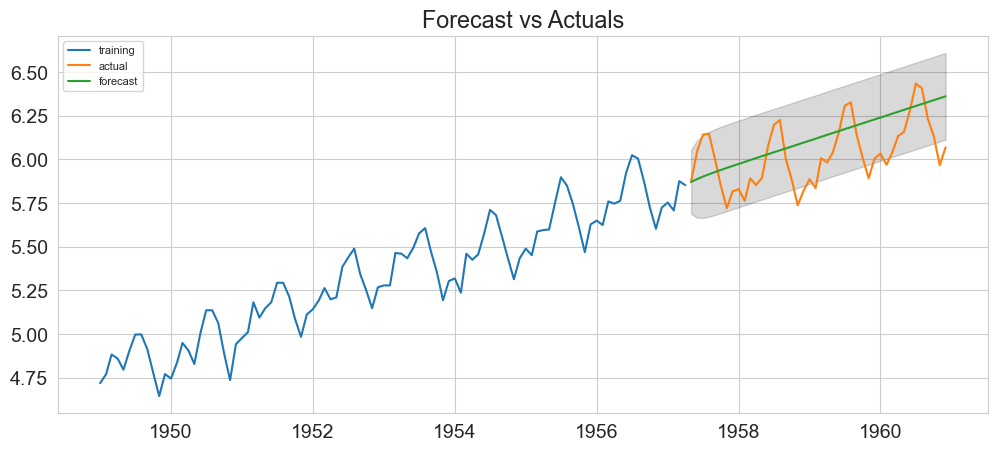

In [85]:
# model = ARIMA(train, order=(3,2,1))  
#ARIMA iz ove biblioteke koristi Kalmanov filter
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(44, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#predviđanje ovog modela neće biti dobro jer nije uključio sezonsku komponentu,
#već samo trend

In [86]:
# Create Training and Test
train = data['lnair'][:100]
test = data['lnair'][100:]

In [87]:
#Hoćemo da plotujemo predviđene vrednosti SARIMAX modela
#Parametar simple_differencing se mora isključiti ako želimo da predviđamo izvorne
#nediferencirane podatke
mod = sm.tsa.statespace.SARIMAX(train, order=(2,1,0), 
                                seasonal_order=(1,1,0,12), 
                                simple_differencing=False)
res = mod.fit(disp=False)

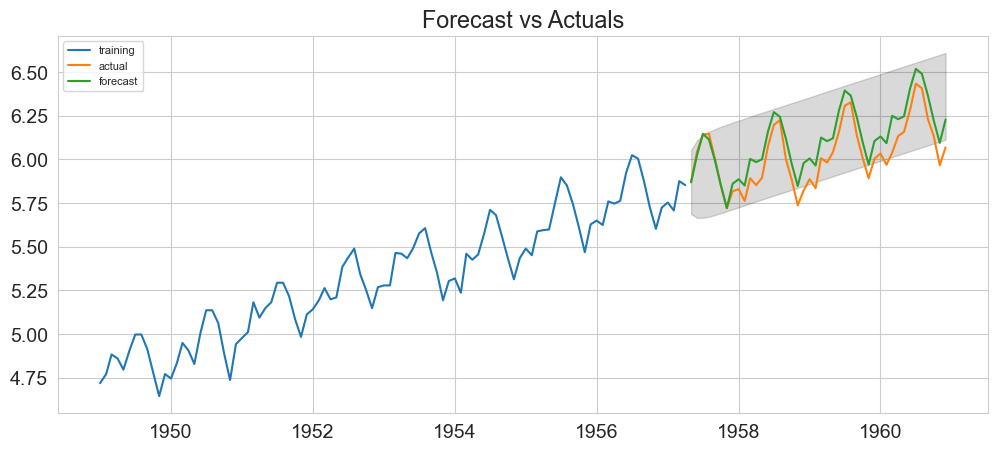

In [88]:
forecast = res.forecast(44)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forecast, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#Probamo još jedan običan SARIMA model
#Ovde je sezoniranje urađeno kroz diferenciranje kroz d=12.
#Ovo je jedan interesantan način da se pronađe pravi period sezone
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
                   parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Izvorna vremenska serija')
axes[0].plot(data[:].diff(1), label='Diferenciranje prvog reda (t-(t-1))')
axes[0].set_title('Uobičajeno diferenciranje')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Izvorna vremenska serija')
axes[1].plot(data[:].diff(12), label='Sezonsko diferenciranje - d=12', color='green')
axes[1].set_title('Sezonsko diferenciranje za mesece')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Prodaja lekova', fontsize=16)

In [ ]:
#Problemi sa instalacijom pyramid-arima
#!pip3 install pyramid-arima
#import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
#smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         #test='adf',
                         #max_p=3, max_q=3, m=12,
                         #start_P=0, seasonal=True,
                         #d=None, D=1, trace=True,
                         #error_action='ignore',  
                         #suppress_warnings=True, 
                         #stepwise=True)

#smodel.summary()

In [ ]:
#Na osnovu pmarime najmanji AIC je imao model SARIMAX(3, 0, 0)x(0, 1, 1, 12)
#Sada ćem ona osnovu tog modela da predvidimo naredne dve godine prodaje lekova
smodel = sm.tsa.statespace.SARIMAX(train, order=(2,1,0), 
                                seasonal_order=(1,1,0,12), 
                                simple_differencing=False)
res = mod.fit(disp=False)

In [ ]:
data['value']

In [ ]:
# Create Training and Test
train = data['value'][:100]
test = data['value'][100:]

In [ ]:
forecast = res.forecast(24)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='trening podaci')
plt.plot(test, label='stvarni podaci')
plt.plot(forecast, label='predvidjanje')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#Plot ukazuje da je pm.autoarima (pyramid arima) dobro identifikovala precizan model
#SARIMAX(3, 0, 0)x(0, 1, 1, 12)